In [39]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from IPython.display import Audio
import torchaudio.transforms as T

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cpu')

### Part 1

External Dataset Analysis. In the context of **speech-to-speech** generation, we compare the ground truths against the generated audios in the time-frequency and time domains. 

In [14]:
audio_gt, sr = torchaudio.load("data/wavs/dla.wav", format='wav')
audio_gen, sr = torchaudio.load("data/examples/example2/dla.wav", format='wav')

In [21]:
Audio(audio_gt, rate=2*22050)

In [22]:
Audio(audio_gen, rate=2*22050)

Text(0, 0.5, 'Genereated')

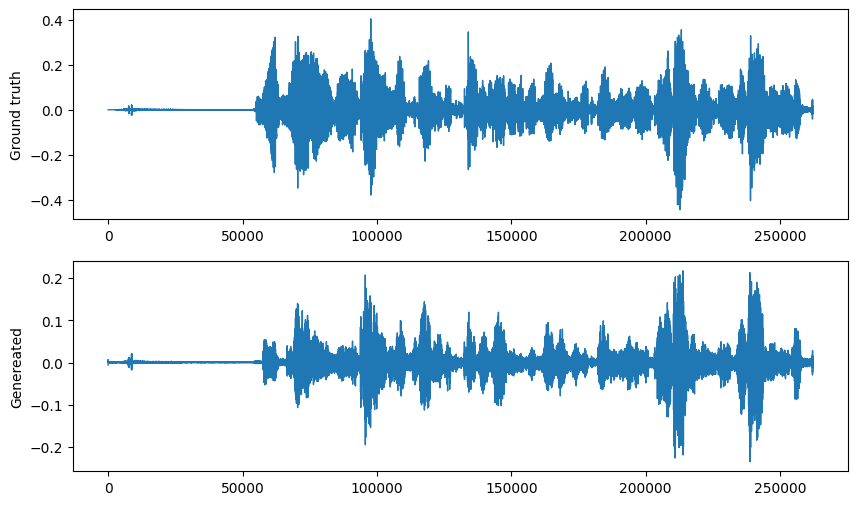

In [37]:
figure, axes = plt.subplots(2, 1, figsize=(10,6))
axes[0].plot(audio_gt[0, :2**18], linewidth=1)
axes[0].set_ylabel(f'Ground truth')
axes[1].plot(audio_gen[0, :2**18], linewidth=1)
axes[1].set_ylabel(f'Genereated')

The supports of wavs look quite alike.

The magnitude differs by a factor of two.

<Figure size 1000x800 with 0 Axes>

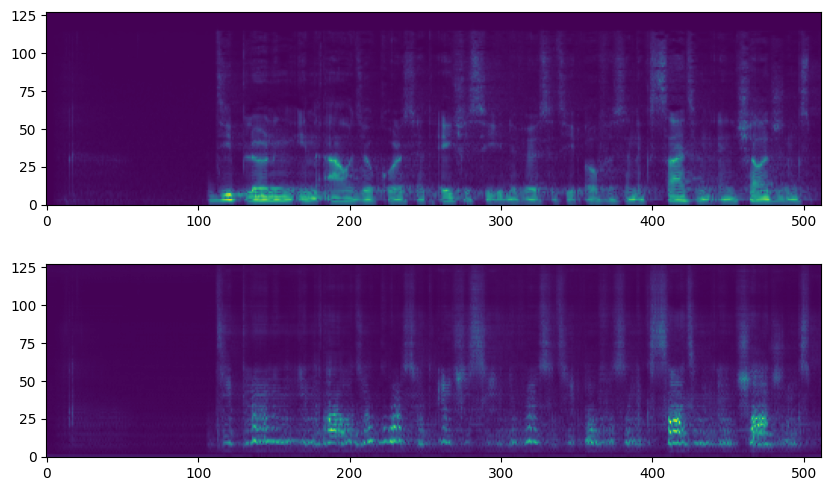

In [71]:
mel_spectrogram = T.MelSpectrogram(
    sample_rate=22050,
    n_fft=1025,
    power=0.5,
    norm='slaney',
    mel_scale="htk",
)

mel_gt = mel_spectrogram(audio_gt[0, ..., :2**18])
mel_gen = mel_spectrogram(audio_gen[0, ..., :2**18])

plt.figure(figsize=(10,8))
figure, axes = plt.subplots(2, 1, figsize=(10,6))
axes[0].imshow(mel_gt, origin='lower')
axes[1].imshow(mel_gen, origin='lower')

Strange story. Oh well. Hakuna matata.

### Part 2.

Full-TTS system Analysis. In the context of **text-to-speech** generation, we compare the ground truths against the generated audios in the time-frequency and time domains.

In [75]:
audio_gen, sr = torchaudio.load("data/examples/example/Utterance1.wav", format='wav')

In [76]:
Audio(audio_gen, rate=22050)

Generating from text gets us much better quality than generating wavs !

In [78]:
audio_gen, sr = torchaudio.load("data/examples/example/Utterance2.wav", format='wav')

In [79]:
Audio(audio_gen, rate=22050)